In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('RansomwareData.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, 10001 to 0.30934
dtypes: int64(30970)
memory usage: 359.9 MB


In [4]:
dataset.head(5)

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.columns = [i + 1 for i in range(30970)]
dataset

,1,2,3,4,5,6,7,8,9,10,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data = dataset.iloc[:, 3:14703]
data

,4,5,6,7,8,9,10,11,12,13,...,14694,14695,14696,14697,14698,14699,14700,14701,14702,14703
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,0,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1521,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
label = dataset.iloc[:, 1]
label

0       1
1       1
2       1
3       1
4       1
       ..
1518    0
1519    0
1520    0
1521    0
1522    0
Name: 2, Length: 1523, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [57]:
'''
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                shuffle = True,
                                                random_state = 42)
'''

'\nX_train, X_test, y_train, y_test = train_test_split(data,\n                                                    label,\n                                                    test_size = 0.2,\n                                                    shuffle = True,\n                                                    random_state = 42)\n\nX_val, X_test, y_val, y_test = train_test_split(X_test,\n                                                y_test,\n                                                test_size = 0.5,\n                                                shuffle = True,\n                                                random_state = 42)\n'

In [58]:
'''
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)
'''

"\nprint('X_train: ', X_train.shape)\nprint('y_train: ', y_train.shape)\n\nprint('X_val: ', X_val.shape)\nprint('y_val: ', y_val.shape)\n\nprint('X_test: ', X_test.shape)\nprint('y_test: ', y_test.shape)\n"

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    stratify = label,
                                                    random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                shuffle = True,
                                                random_state = 42)

In [60]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1218, 14700)
y_train:  (1218,)
X_val:  (152, 14700)
y_val:  (152,)
X_test:  (153, 14700)
y_test:  (153,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [62]:
model_rf = RandomForestClassifier()
param_grid = { 'n_estimators': [5, 10, 50, 100] }

grid_rf =  GridSearchCV(model_rf, param_grid = param_grid, cv = 10, refit = True)
grid_rf.fit(X_train, y_train)

print('best parameters: ', grid_rf.best_params_) # 최적 하이퍼 파라미터
print('best score : ', grid_rf.best_score_) # 최고 예측 정확도

best parameters:  {'n_estimators': 50}
best score :  0.9531838504267715


In [63]:
importances = grid_rf.best_estimator_.feature_importances_

In [64]:
import matplotlib.pyplot as plt

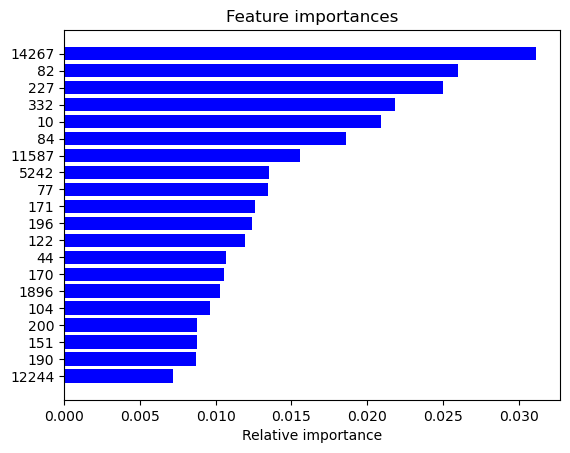

In [65]:
indices = np.argsort(importances)[-20:]
plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()